# <font color='red'>Probability Distribution </font>

**Discrete:** represent outcomes that can be counted or enumerated (e.g., number of students in a class)<br>
**Continuous:** represent outcomes that can take any value within a range (e.g., height of individuals)<br>

**Symmetric:** where the left and right sides mirror each other (e.g., normal distribution)<br>
**Skewed:** where one tail is longer than the other (e.g., exponential distribution)<br>

**Unimodal:** single mode<br>
**Bimodal:** two modes<br>
**Multimodal:** more than two modes<br>

**Narrow peak and low dispersion** (e.g., normal distribution)<br>
**Wider spread** (e.g., uniform distribution)<br>

**Parametric:** finite number of parameters, such as mean and variance, which fully describe the distribution<br>
**Nonparametric:** do not have a fixed set of parameters and may require more flexible methods for estimation<br>

**Location** (e.g., mean or median)<br>
**Scale** (e.g., standard deviation or variance)

1. Uniform distribution
2. Exponential distribution
3. Normal Distribution
4. Student’s t Distribution
5. Bioniomal Distribution
6. Poisson Distribution
7. F Distribution
8. Chi Distribution
9. Geometric Distribution
10. Hypergeometric Distribution

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Uniform distribution

* Continuous
* Symmetric
* Non-skewed
* Constant probability density over a defined range
* Often used for random sampling and simulation

$$ f(x) = \frac{1}{b-a} \quad \mu = \frac{a+b}{2} \quad \sigma^2 = \frac{(b-a)^2}{12} $$

**When to use:** Use the uniform distribution when all outcomes in a sample space are equally likely to occur.<br>
**Strengths:** Simple and easy to understand, useful for modeling situations where outcomes are equally probable.<br>
**Weaknesses:** Limited applicability to real-world scenarios, may not accurately represent many natural phenomena.<br>
**Limitations:** Assumes a finite or countable sample space, may not accurately represent situations with unequal probabilities.

A company wants to **simulate the arrival times of customers** at a store with a uniform distribution to **optimize staffing levels**. The company wants to determine the best number of staff to have on duty during different hours of the day to minimize wait times for customers while also optimizing labor costs.

In [2]:
#Parameters
start_time = 0  # Store opens
end_time = 720  # Store closes (12 hours * 60 minutes)
num_customers = 1000  # Number of simulated customers
min_arrival_time = 0  # Minimum arrival time
max_arrival_time = 60  # Maximum arrival time (uniform distribution)

# Simulate customer arrival times using a uniform distribution
arrival_times = np.random.uniform(min_arrival_time, max_arrival_time, num_customers)

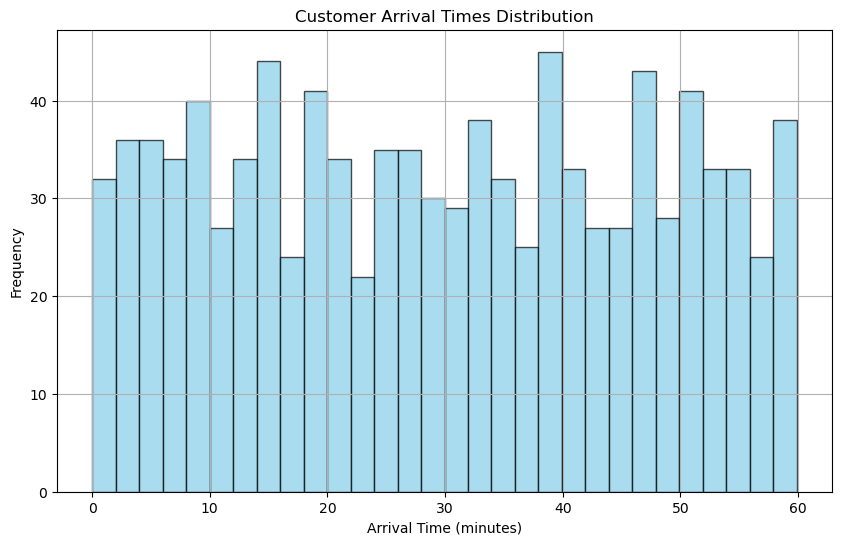

In [4]:
# Plot the histogram of customer arrival times
plt.figure(figsize=(10, 6))
plt.hist(arrival_times, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Customer Arrival Times Distribution')
plt.xlabel('Arrival Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Exponential distribution

* Continuous
* Right-skewed
* Single-parameter (rate parameter λ)
* Models the time between events in a Poisson process
* Commonly used for modeling waiting times, arrival times, and lifetimes

$$ f(x) = \lambda e^{-\lambda x}, \text{for } x \geq 0 \quad \mu = \frac{1}{\lambda}  \quad \sigma^2 = \frac{1}{\lambda^2} $$

**When to use:** Use the exponential distribution to model the time between events in a Poisson process, where events occur continuously and independently at a constant average rate.<br>
**Strengths:** Useful for modeling the time until the next event occurs in processes such as radioactive decay, arrival times of customers in queues, and reliability analysis.<br>
**Weaknesses:** Assumes events occur independently and at a constant rate, may not accurately represent situations with varying rates.<br>
**Limitations:** Not suitable for modeling events with non-constant rates, such as systems with repair or renewal processes.

A company wants to simulate the inter-arrival times of customers at a service counter using an exponential distribution. This can help the company analyze customer flow patterns and optimize staffing levels to minimize wait times.

In [5]:
#Parameters
# Set the parameters for the exponential distribution (inter-arrival times in minutes)
arrival_rate = 0.1  # Average number of arrivals per minute
num_customers = 1000  # Number of simulated customers

# Simulate inter-arrival times using an exponential distribution
inter_arrival_times = np.random.exponential(scale=1/arrival_rate, size=num_customers)

# Calculate arrival times based on inter-arrival times
arrival_times = np.cumsum(inter_arrival_times)

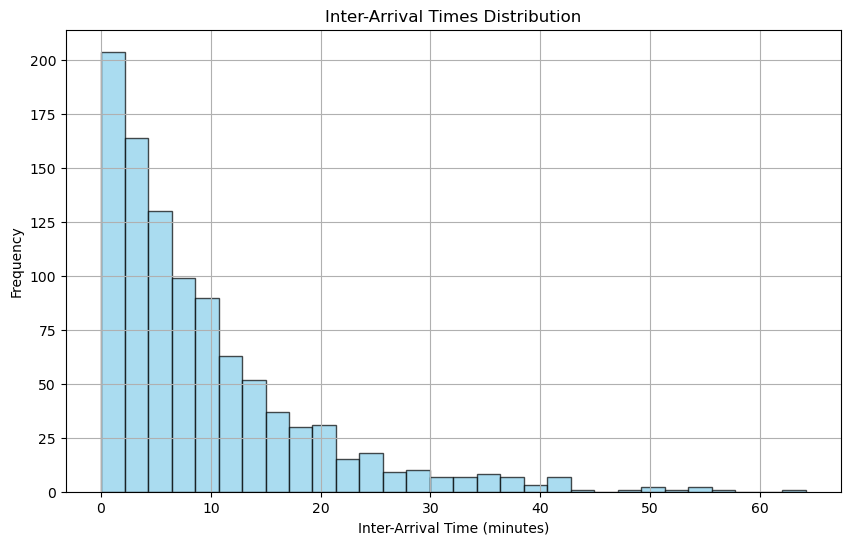

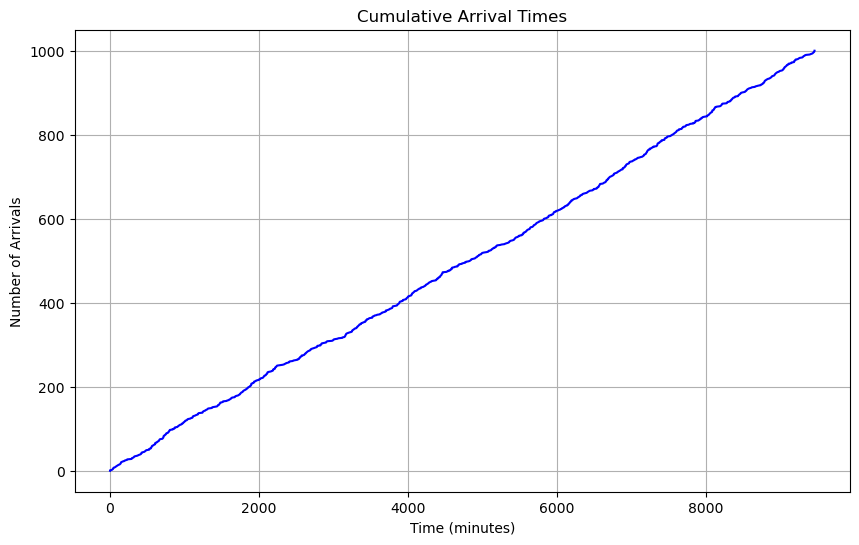

In [7]:
# Plot the histogram of inter-arrival times
plt.figure(figsize=(10, 6))
plt.hist(inter_arrival_times, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Inter-Arrival Times Distribution')
plt.xlabel('Inter-Arrival Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the cumulative arrival times
plt.figure(figsize=(10, 6))
plt.plot(arrival_times, np.arange(1, num_customers + 1), color='blue')
plt.title('Cumulative Arrival Times')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Arrivals')
plt.grid(True)
plt.show()

### Normal Distribution 

* Continuous
* Symmetric
* Bell-shaped curve
* Described by mean (μ) and standard deviation (σ)
* Central limit theorem applies

$$
f(x | \mu, \sigma^2) = \frac{1}{{\sigma \sqrt{2\pi}}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
x = variable for which the probability density is calculated<br>
μ = mean of the distribution<br>
σ = standard deviation of the distribution

**When to use:** Use when you're interested in modeling continuous random variables that are symmetrically distributed around a mean.<br>
**Strengths:** Widely applicable, easy to work with, well-understood properties.<br>
**Weaknesses:** Assumes normality, sensitive to outliers.

In [24]:
from scipy.stats import norm

A manufacturing company produces a certain type of component, and the **diameter of these components follows a normal distribution** with a **mean diameter of 12 centimeters** and a **standard deviation of 0.5 centimeters**.

What is the **probability** that a **randomly selected component** will have a **diameter between 11.5 centimeters and 12.5 centimeters**?

In [25]:
mean_diameter = 12  # centimeters

# Standard deviation of diameters
std_deviation = 0.5  # centimeters

# Lower and upper limits of diameter range
lower_limit = 11.5  # centimeters
upper_limit = 12.5  # centimeters

# Generate x values (diameter values)
x = np.linspace(9, 15, 1000)  # Considering a range of diameters from 9 to 15 centimeters

In [26]:
# Calculate the probability using the cumulative distribution function (CDF)
probability = norm.cdf(upper_limit, mean_diameter, std_deviation) - norm.cdf(lower_limit, mean_diameter, std_deviation)

print("Probability of a randomly selected component having a diameter between 11.5 and 12.5 centimeters:")
print("Probability =", probability)

Probability of a randomly selected component having a diameter between 11.5 and 12.5 centimeters:
Probability = 0.6826894921370859


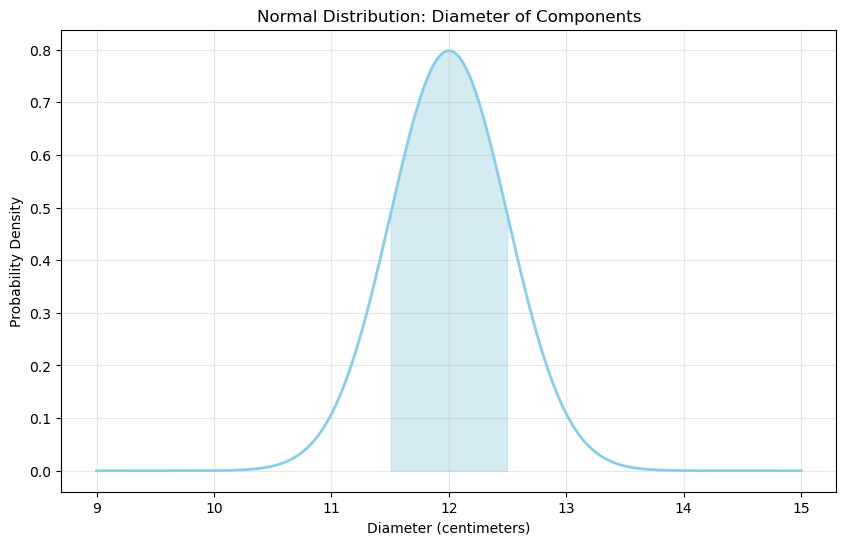

In [27]:
# Calculate the probability density function (PDF)
pdf = norm.pdf(x, mean_diameter, std_deviation)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title('Normal Distribution: Diameter of Components')
plt.xlabel('Diameter (centimeters)')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.fill_between(x, pdf, where=((x >= lower_limit) & (x <= upper_limit)), color='lightblue', alpha=0.5)
plt.show()

### Student’s t Distribution 

* Continuous
* Symmetric (for degrees of freedom > 1)
* Approaches the normal distribution as degrees of freedom increase
* Used for hypothesis testing and confidence intervals for small sample sizes
* More robust to outliers than the normal distribution

$$
f(t | \nu) = \frac{{\Gamma\left(\frac{\nu + 1}{2}\right)}}{{\sqrt{\nu\pi} \Gamma\left(\frac{\nu}{2}\right) \left(1 + \frac{t^2}{\nu}\right)^{\frac{\nu + 1}{2}}}}
$$
t = variable for which the probability density is calculated<br>
ν = degrees of freedom parameter<br>
Γ = gamma function

**When to use:** Use for inference about the mean of a normally distributed population when the sample size is small or when the population standard deviation is unknown.<br>
**Strengths:** Applicable for small sample sizes, robust to deviations from normality.<br>
**Weaknesses:** Less efficient than the normal distribution for large sample sizes.

In [28]:
from scipy.stats import t

A company is conducting a study on the average commute time of its employees. A **random sample of 15 employees** is selected, and their commute times (in minutes) are recorded. The **sample mean** commute time is found to be **28 minutes**, with a **sample standard deviation of 5 minutes**.

What is the **probability** that the **population mean commute time is greater than 30 minutes**?

In [29]:
# Sample parameters
sample_mean = 28  # Sample mean commute time (minutes)
sample_std_deviation = 5  # Sample standard deviation of commute times (minutes)
sample_size = 15  # Sample size

# Population mean hypothesis
population_mean_hypothesis = 30  # Population mean commute time hypothesis (minutes)

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Calculate the t-score
t_score = (sample_mean - population_mean_hypothesis) / (sample_std_deviation / (sample_size ** 0.5))

# Generate x values (t-values)
x = np.linspace(-4, 4, 1000)  # Considering a range of t-values

In [30]:
# Calculate the probability using the cumulative distribution function (CDF)
probability = 1 - t.cdf(t_score, degrees_of_freedom)

print("Probability that the population mean commute time is greater than 30 minutes:")
print("Probability =", probability)

Probability that the population mean commute time is greater than 30 minutes:
Probability = 0.9281799998773894


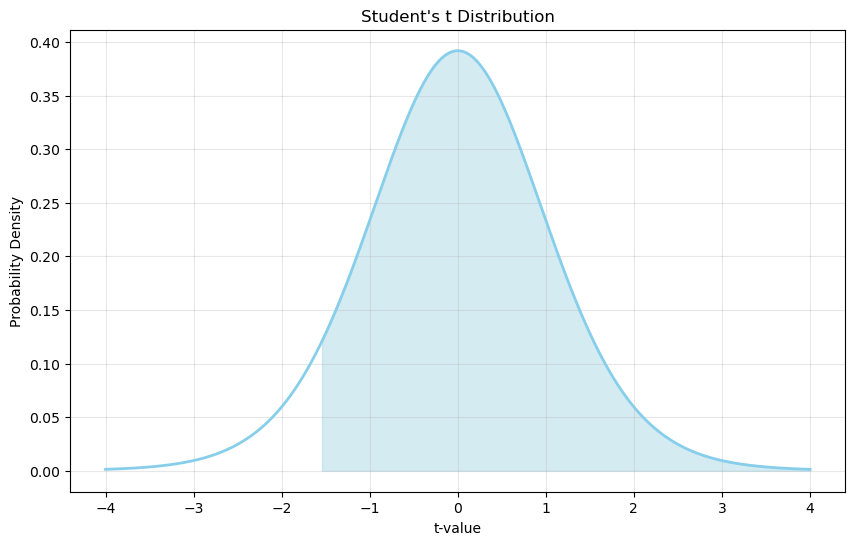

In [31]:
# Calculate the probability density function (PDF) for the given degrees of freedom
pdf = t.pdf(x, degrees_of_freedom)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("Student's t Distribution")
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.fill_between(x, pdf, where=(x >= t_score), color='lightblue', alpha=0.5)
plt.show()

### Bioniomal Distribution 

* Discrete
* Right-skewed for small sample sizes, symmetric for large sample sizes
* Models the number of successes in a fixed number of independent trials
* Described by parameters n (number of trials) and p (probability of success)
* Commonly used in A/B testing, quality control, and reliability analysis

$$ P(X) = \binom{n}{x} p^x q^{n-x} = \frac{n!}{(n-x)!x!} p^x q^{n-x} $$
n = number of trials (or number being sampled)<br>
x = number of successes desired<br>
p = probability of success on each trial<br>
q = 1 - p = the probability of getting a failure in one trial 

**When to use:** Use when you have a fixed number of independent trials, each with the same probability of success, and you're interested in the number of successes.<br>
**Strengths:** Simple to understand and apply, appropriate for binary outcomes.<br>
**Weaknesses:** Assumes a fixed number of trials, may not be suitable for continuous outcomes.

In [8]:
from scipy.stats import binom

A call center receives an average of 100 customer service calls per hour during peak hours. Based on historical data, it is observed that **30%** of these calls result in a customer **requesting a refund** due to dissatisfaction with the service. 

What is the **probability** that exactly **25 out of 80** randomly selected calls during peak hours will result in a customer requesting a **refund**?

In [9]:
# Parameters
n = 80  # Number of calls selected
p = 0.3  # Probability of a call resulting in a refund

# Number of successes (customer requests for refund)
k = 25

# Generate x values (number of successes)
x = np.arange(0, n+1)

In [10]:
# Calculate the probability mass function (PMF) for exactly k successes
probability = binom.pmf(k, n, p)

print("Probability that exactly 25 out of 80 randomly selected calls result in a refund:")
print("Probability =", probability)

Probability that exactly 25 out of 80 randomly selected calls result in a refund:
Probability = 0.09307325474192697


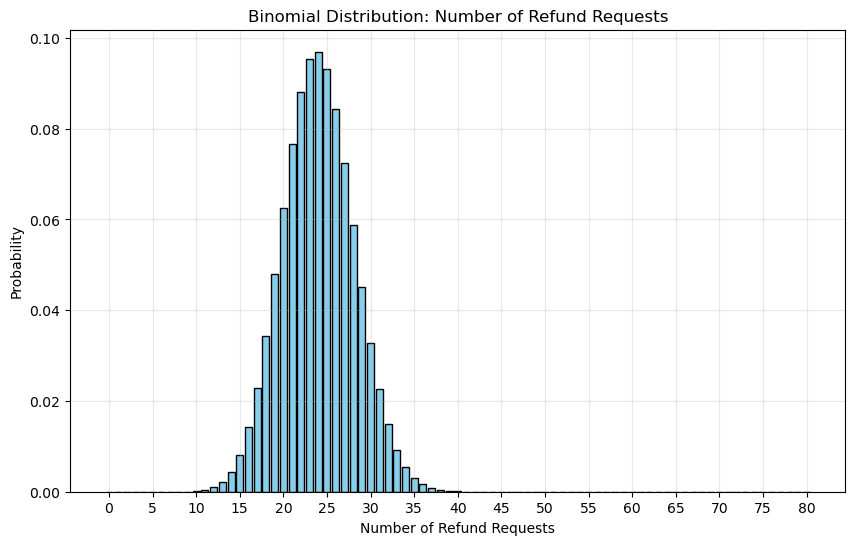

In [11]:
# Calculate the probability mass function (PMF)
pmf = binom.pmf(x, n, p)

# Plot the PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('Binomial Distribution: Number of Refund Requests')
plt.xlabel('Number of Refund Requests')
plt.ylabel('Probability')
plt.xticks(np.arange(0, n+1, 5))
plt.grid(True, alpha=0.3)
plt.show()

### Poisson Distribution

* Discrete
* Right-skewed
* Models the number of events occurring in a fixed interval of time or space
* Described by parameter λ (average rate of occurrence)
* Commonly used for modeling count data such as arrivals, defects, and occurrences

$$ P(X) = \frac{\lambda^{x}e^{-\lambda}}{x!} $$
x = number of success <br>
$ \lambda $ = rate of success <br>
e = Eular's number = 2.71828

**When to use:** Use when your'e interested in the number of events that occur in a fixed interval of time or space, given a known average rate of occurrence.<br>
**Strengths:** Useful for modeling rare events, easy to work with.<br>
**Weaknesses:** Assumes events occur independently and at a constant rate, may not be suitable for events with varying rates.

In [12]:
from scipy.stats import poisson

A bakery receives an **average of 50 online orders per day** for their specialty cakes. The bakery uses a Poisson distribution to model the number of orders they receive.

What is the **probability** that the bakery will receive exactly **60 online orders tomorrow**?

In [13]:
# Parameters
average_orders_per_day = 50  # Average number of orders per day

# Number of orders expected tomorrow
number_of_orders_tomorrow = 60

# Generate x values (number of orders)
x = np.arange(0, 101)  # Assuming a maximum of 100 orders for visualization purposes

In [14]:
# Calculate the probability mass function (PMF) for exactly number_of_orders_tomorrow orders
probability = poisson.pmf(number_of_orders_tomorrow, average_orders_per_day)

print("Probability of receiving exactly 60 online orders tomorrow:")
print("Probability =", probability)

Probability of receiving exactly 60 online orders tomorrow:
Probability = 0.020104872145675377


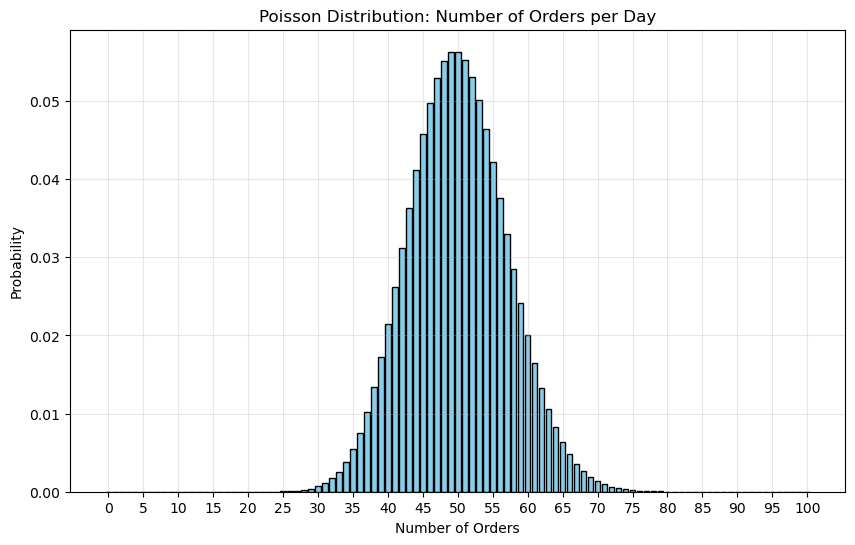

In [15]:
# Calculate the probability mass function (PMF)
pmf = poisson.pmf(x, average_orders_per_day)

# Plot the PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('Poisson Distribution: Number of Orders per Day')
plt.xlabel('Number of Orders')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True, alpha=0.3)
plt.show()

### F Distribution

* Continuous
* Right-skewed
* Two parameters: degrees of freedom for numerator and denominator
* Used for comparing variances or testing the equality of means in ANOVA
* Commonly used in analysis of variance (ANOVA) and regression analysis

$$
f(x | d_1, d_2) = \frac{{\Gamma\left(\frac{{d_1 + d_2}}{2}\right)}}{{\Gamma\left(\frac{{d_1}}{2}\right) \Gamma\left(\frac{{d_2}}{2}\right)}} \left(\frac{{d_1}}{{d_2}}\right)^{\frac{{d_1}}{2}} \frac{{x^{\frac{{d_1}}{2} - 1}}}{{\left(1 + \frac{{d_1}}{{d_2}}x\right)^{\frac{{d_1 + d_2}}{2}}}}
$$

x = variable for which the probability density is calculated<br>
d1 and d2 = degrees of freedom parameters<br>
Γ = gamma function

**When to use:** Use in analysis of variance (ANOVA) and regression analysis to compare variances or test for differences in means among multiple groups.<br>
**Strengths:** Useful for comparing variances, applicable in regression and ANOVA.<br>
**Weaknesses:** Sensitive to departures from normality and unequal variances.

In [32]:
from scipy.stats import f

An investment company is comparing the performance of two different investment strategies. They collect the returns from each strategy over a period of time and want to determine if one strategy consistently outperforms the other in terms of variance.

For Strategy A, they calculate a **sample variance of 16, based on 10 observations**. For Strategy B, they calculate a **sample variance of 25, based on 12 observations**.

Is there **sufficient evidence** to conclude that the **variance of returns for Strategy A is different from the variance of returns for Strategy B**?

In [33]:
# Sample variances
variance_a = 16
variance_b = 25

# Sample sizes
n_a = 10
n_b = 12

# Calculate the F-statistic
f_statistic = variance_a / variance_b

# Degrees of freedom
degrees_of_freedom_a = n_a - 1
degrees_of_freedom_b = n_b - 1

# Generate x values (F-values)
x = np.linspace(0.01, 10, 1000)  # Considering a range of F-values

# Degrees of freedom
dfn = degrees_of_freedom_a
dfd = degrees_of_freedom_b

In [34]:
# Calculate the probability using the cumulative distribution function (CDF)
probability = f.cdf(f_statistic, degrees_of_freedom_a, degrees_of_freedom_b)

print("F-statistic:", f_statistic)
print("Probability:", probability)

F-statistic: 0.64
Probability: 0.2560301538914467


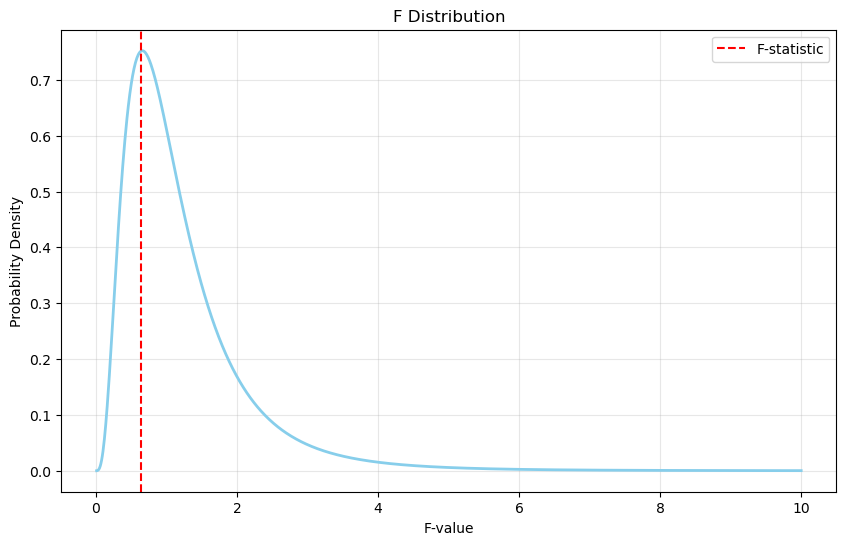

In [35]:
# Calculate the probability density function (PDF)
pdf = f.pdf(x, dfn, dfd)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("F Distribution")
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.axvline(x=f_statistic, color='red', linestyle='--', label='F-statistic')
plt.legend()
plt.show()

### Chi Square Distribution

* Continuous
* Right-skewed
* Described by degrees of freedom
* Used for hypothesis testing and confidence intervals involving sums of squares
* Commonly used in goodness-of-fit tests, tests of independence, and tests of homogeneity

$$
f(x | k) = \frac{{x^{\frac{{k - 2}}{2}} e^{-\frac{x}{2}}}}{{2^{\frac{{k}}{2}} \Gamma\left(\frac{{k}}{2}\right)}}
$$

x = variable for which the probability density is calculated<br>
k = degrees of freedom parameter<br>
Γ = gamma function

**When to use:** Use in hypothesis testing, goodness-of-fit tests, and tests of independence in categorical data analysis.<br>
**Strengths:** Useful for categorical data analysis, widely applicable.<br>
**Weaknesses:** Sensitive to sample size, assumptions may not always hold.

In [36]:
from scipy.stats import chi2

A quality control manager at a manufacturing plant is testing the consistency of product packaging. The manager selects a **random sample of 100 packaged products** and measures the weight of each package. The **standard weight** for each package should be **500 grams**. Based on the sample, the manager wants to determine if there is a **significant difference between the observed weights and the standard weight**.

Is there **sufficient evidence** to conclude that the **variability in package weights differs from the standard weight of 500 grams**?


In [37]:
# Observed package weights (in grams)
observed_weights = np.random.normal(500, 10, 100)  # Generating random weights for demonstration

# Expected standard weight (in grams)
standard_weight = 500

# Calculate the chi-square statistic
chi_square_statistic = np.sum(((observed_weights - standard_weight) ** 2) / standard_weight)

# Degrees of freedom
degrees_of_freedom = len(observed_weights) - 1

# Generate x values (chi-square values)
x = np.linspace(0, 50, 1000)  # Considering a range of chi-square values

# Degrees of freedom
df = degrees_of_freedom

In [38]:
# Calculate the probability using the survival function (SF)
probability = chi2.sf(chi_square_statistic, degrees_of_freedom)

print("Chi-square statistic:", chi_square_statistic)
print("Probability:", probability)

Chi-square statistic: 16.60937159857423
Probability: 1.0


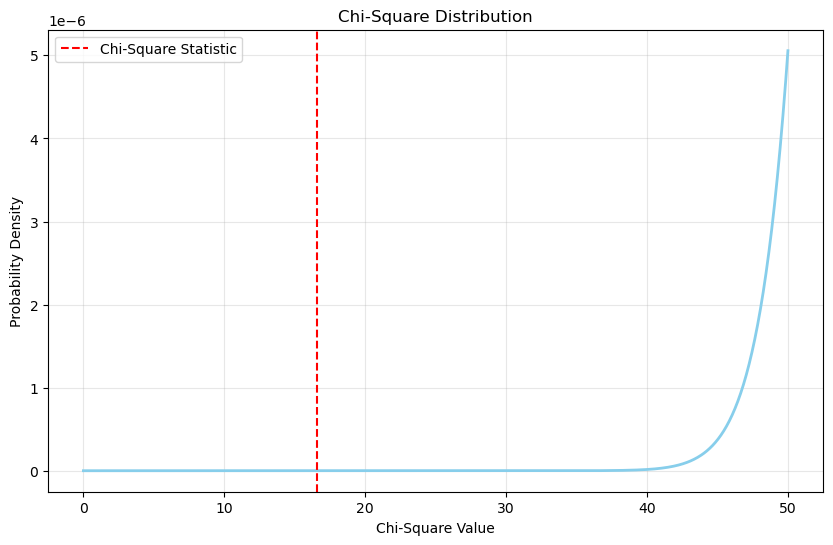

In [39]:
# Calculate the probability density function (PDF)
pdf = chi2.pdf(x, df)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("Chi-Square Distribution")
plt.xlabel('Chi-Square Value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.axvline(x=chi_square_statistic, color='red', linestyle='--', label='Chi-Square Statistic')
plt.legend()
plt.show()

### Geometric Distribution

* Discrete
* Right-skewed 
* Models the number of trials needed to obtain the first success in a sequence of independent trials 
* Described by parameter p (probability of success in each trial)
* Commonly used in reliability analysis, queuing theory, and survival analysis

$$ P(X) = (1-p)^{x-1}p $$
x = number of trials until the first success<br>
p = probability of success on each trial<br>

**When to use:** Use when you're interested in the number of trials needed to achieve the first success in a sequence of independent Bernoulli trials.<br>
**Strengths:** Useful for modeling the time until the first success, simple to understand.<br>
**Weaknesses:** Assumes a fixed probability of success, may not be suitable for events with changing probabilities.

In [16]:
from scipy.stats import geom

A software company is launching a new product and running an email marketing campaign to attract customers. Based on historical data, the company knows that the probability of a customer making a **purchase after opening the first promotional email is 0.1**.

What is the **probability** that the **first purchase occurs on the third promotional email** sent to a customer?


In [17]:
# Probability of making a purchase after opening the first promotional email
p = 0.1

# Number of trials until the first success (purchase)
k = 3

# Generate x values (number of trials until success)
x = np.arange(1, 21)  # Number of trials up to 20 for visualization purposes

In [18]:
# Calculate the probability mass function (PMF) for the first purchase occurring on the k-th trial
probability = geom.pmf(k, p)

print("Probability of the first purchase occurring on the third promotional email:")
print("Probability =", probability)

Probability of the first purchase occurring on the third promotional email:
Probability = 0.08100000000000002


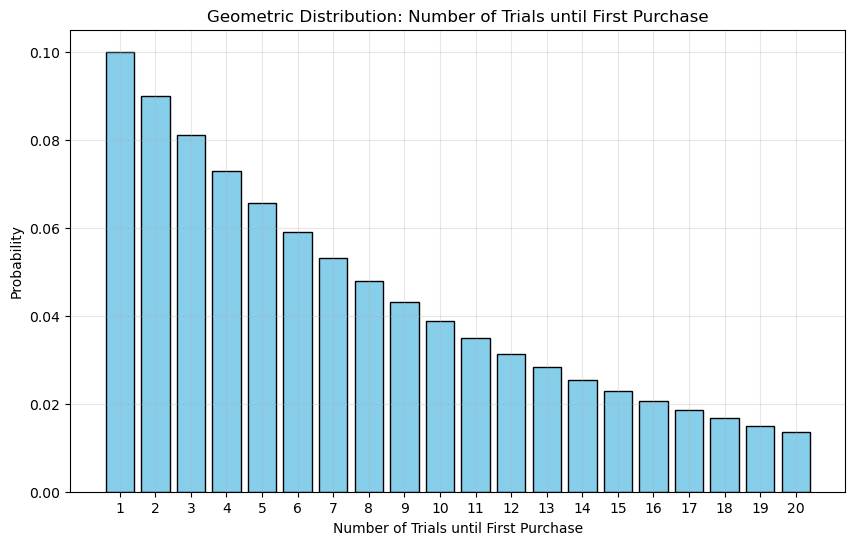

In [19]:
# Calculate the probability mass function (PMF)
pmf = geom.pmf(x, p)

# Plot the PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('Geometric Distribution: Number of Trials until First Purchase')
plt.xlabel('Number of Trials until First Purchase')
plt.ylabel('Probability')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True, alpha=0.3)
plt.show()

### Hypergeometric Distribution

* Discrete
* Right-skewed
* Models the number of successes in a sample drawn without replacement from a finite population
* Described by parameters N (population size), K (number of successes in the population), and n (sample size)
* Commonly used in sampling theory, quality control, and bioinformatics

$$ P(X = k) = \frac{{\binom{K}{k} \binom{N - K}{n - k}}}{{\binom{N}{n}}} $$
N = population size<br>
K = number of successes in the population<br>
n = number of draws<br>
k = number of successes in the draws

**When to use:** Use when you're interested in sampling without replacement from a finite population containing both successes and failures.<br>
**Strengths:** Appropriate for sampling without replacement, useful for small populations.<br>
**Weaknesses:** Requires knowledge of population parameters, may not be suitable for large populations.

In [20]:
from scipy.stats import hypergeom

 A company is selecting candidates for a specialized training program. There are **200 applicants for the program, of which 50 are women**. The company aims to select a team of 20 candidates for the program.

What is the **probability** that exactly **5 women will be selected in the team of 20** candidates?

In [21]:
# Total number of applicants
total_applicants = 200

# Number of women among the applicants
women_applicants = 50

# Number of candidates to be selected for the program
selected_candidates = 20

# Number of women to be selected among the candidates
selected_women = 5

x = np.arange(0, min(women_applicants, selected_candidates) + 1)

In [22]:
# Calculate the probability mass function (PMF) for exactly selected_women women being selected
probability = hypergeom.pmf(selected_women, total_applicants, women_applicants, selected_candidates)

print("Probability of exactly 5 women being selected in the team of 20 candidates:")
print("Probability =", probability)

Probability of exactly 5 women being selected in the team of 20 candidates:
Probability = 0.2132329797777377


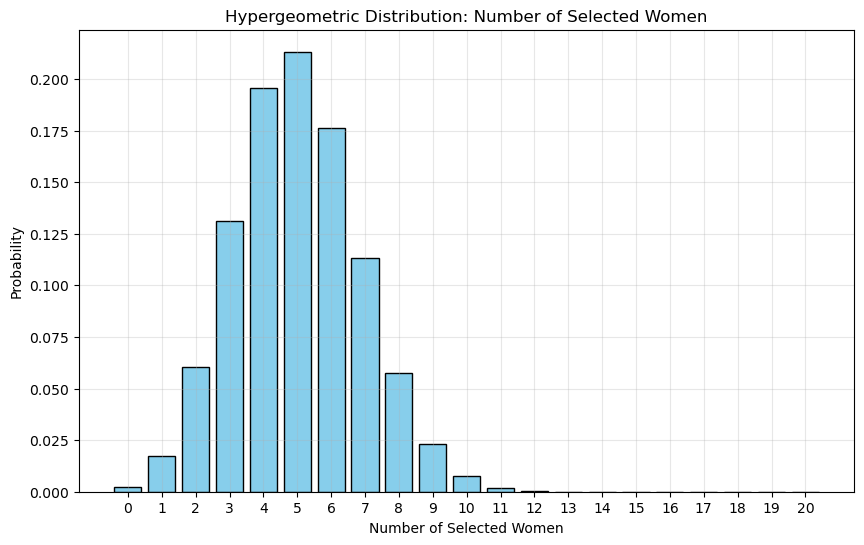

In [23]:
# Calculate the probability mass function (PMF)
pmf = hypergeom.pmf(x, total_applicants, women_applicants, selected_candidates)

# Plot the PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('Hypergeometric Distribution: Number of Selected Women')
plt.xlabel('Number of Selected Women')
plt.ylabel('Probability')
plt.xticks(np.arange(0, min(women_applicants, selected_candidates) + 1, 1))
plt.grid(True, alpha=0.3)
plt.show()